In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/DLC_TSNE")

In [0]:

import urllib.request
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
#load file names
files = [file_i for file_i in os.listdir('data') if file_i.endswith('.jpg')]


In [5]:
files

['ss.jpg',
 'kh.jpg',
 'ysm.jpg',
 'sm.jpg',
 'sj.jpg',
 'mb.jpg',
 'cs.jpg',
 'jm.jpg']

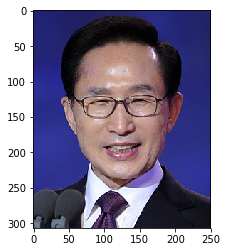

In [6]:
img = plt.imread(os.path.join('data',files[5]))
plt.imshow(img)

# make square size (resize)

In [0]:
#image resize _ to square

from scipy.misc import imresize
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]: #이미지의 세로가 가로보다 클 경우
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0: #extra is even
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:#이미지의 가로가 세로보다 클 경우
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [0]:
#이미지 margin 처리. 여기서는 0.2 만큼 삭제
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


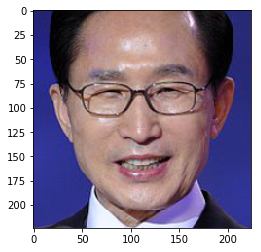

In [9]:
#image crop & load
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (224, 224))
plt.imshow(rsz)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


8


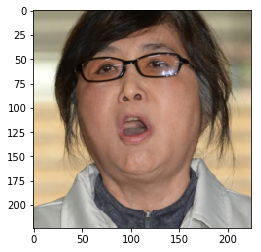

In [10]:
crop_imgs = []
for file_i in files:
    a = plt.imread(os.path.join('data',file_i))
    square = imcrop_tosquare(a)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (224, 224))
    crop_imgs.append(rsz)
print(len(crop_imgs))
plt.imshow(crop_imgs[0])

In [0]:
from PIL import Image
# 만약에 폴더가 없다면, 폴더를 생성
os.mkdir(os.path.join('data','crop_img'))

In [0]:
#square, crop, resize한 이미지들을 해달 폴더에 저장.
for index, item in enumerate(crop_imgs, start=0):
    im = Image.fromarray(item)
    path = 'data/crop_img/'+str(index)+'.jpg'
    im.save(path, 'JPEG')

In [0]:
#cropped file names 
files_crop = [file_i
         for file_i in os.listdir('data/crop_img/')
        if file_i.endswith('.jpg')]

#croped images load
imgs_crop = []
for file_i in files_crop:
    a = plt.imread(os.path.join('data/crop_img/', file_i))
    imgs_crop.append(a)
    
imgs_crop = np.array(imgs_crop)
imgs_crop = np.float32(imgs_crop)

In [23]:
print(imgs_crop.shape)
print(imgs_crop[0].shape)
print(imgs_crop.dtype)


(8, 224, 224, 3)
(224, 224, 3)
float32


In [0]:
#extend 1st dimension for feature extraction
##feature extraction을 위해 기존 이미지를 차원 확장
imgs_ex=[]
for index, img in enumerate(imgs_crop):
    img = np.expand_dims(img, axis=0)
    imgs_ex.append(img)

In [25]:
#imgs_ex의 shape확인. 1차원 확장이 되었음을 확인할 수 있습니당
print(imgs_ex[0].shape)
print(np.array(imgs_ex).shape)
print(np.array(imgs_ex).dtype)

(1, 224, 224, 3)
(8, 1, 224, 224, 3)
float32


In [0]:
#이후 간혹 케라스에서 에러가 나는 경우 keras -> tensorflow.keras로 변경해줍니다.
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [27]:
#VGG16 모델을 다운받습니다
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 16s 0us/step


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [29]:
#첫 번째 이미지를 예측
predictions = model.predict(imgs_ex[0])

for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))    

40960/35363 [==================================] - 0s 2us/step
predicted lab_coat with probability 0.824
predicted sunscreen with probability 0.038
predicted sweatshirt with probability 0.017
predicted trench_coat with probability 0.015
predicted ice_lolly with probability 0.013


In [30]:
#예측 decode
print(decode_predictions(predictions))

[[('n03630383', 'lab_coat', 0.82396865), ('n04357314', 'sunscreen', 0.03758938), ('n04370456', 'sweatshirt', 0.016509898), ('n04479046', 'trench_coat', 0.015356882), ('n07615774', 'ice_lolly', 0.01263075)]]


In [31]:
#다른 이미지도 전부 다 예측합니다
for index, img in enumerate(imgs_ex):
    predict = model.predict(img)
    print("---------------------")
    for _, pred, prob in decode_predictions(predict)[0]:
        print(pred)

---------------------
lab_coat
sunscreen
sweatshirt
trench_coat
ice_lolly
---------------------
wig
bow_tie
suit
lab_coat
oboe
---------------------
suit
Windsor_tie
oboe
bow_tie
lab_coat
---------------------
suit
Windsor_tie
lab_coat
groom
oboe
---------------------
Windsor_tie
suit
lab_coat
bow_tie
stethoscope
---------------------
bow_tie
suit
Windsor_tie
lab_coat
military_uniform
---------------------
suit
bow_tie
Windsor_tie
lab_coat
neck_brace
---------------------
lab_coat
oboe
stethoscope
wig
sweatshirt


In [32]:
#fully connected layer 2의 feature 축출하기
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

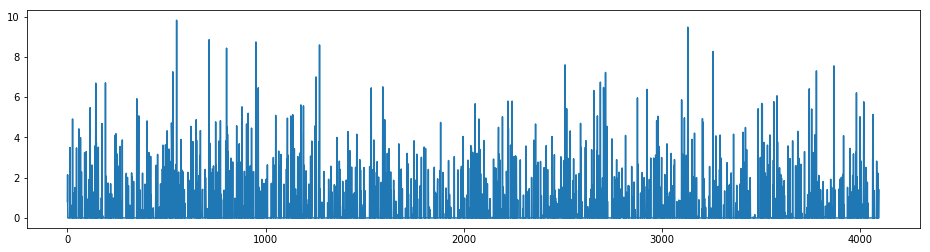

In [33]:
#feature 시각화
feat = feat_extractor.predict(imgs_ex[3])
plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [34]:
print(feat.shape)

(1, 4096)


In [35]:
#각 이미지의 feature를 리스트로 모으면서 시간을 출력해봅니다
import time
tic = time.clock()

features = []
for i, img in enumerate(imgs_ex):
    #3장 당 한 번 씩 얼마나 걸리는지 출력도 해보고
    if i % 3 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(imgs_ex),elap))
        tic = time.clock()
    #각 추출된 feature를 리스트에 모아봅니다
    feat = feat_extractor.predict(img)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(imgs_ex))

analyzing image 0 / 8. Time: 0.0004 seconds.
analyzing image 3 / 8. Time: 0.0293 seconds.
analyzing image 6 / 8. Time: 0.0274 seconds.
finished extracting features for 8 images


In [36]:
#결과적으로 shape는 image_count, feature_shape
features = np.array(features)
#features = np.reshape(features, (-1, 1))
print(features.shape)
#features_sq=np.squeeze(features, axis=1).shape
#print(np.array(features_sq).shape)

(8, 4096)


In [37]:
from sklearn.decomposition import PCA

#제가 이해한 게 맞다면 t_sne의 TC(시간복잡도)가 O(n^2)라 한차원 차원 감소가 필요하다네요
#50과 이미지 갯수 중 적은 값으로 차원감소를 해줍니다(보통 50까지 pca로 줄인다고 합니다)
from sklearn.decomposition import PCA

pca = PCA(n_components=min(features.shape[0],8))
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(8, 8)
[[ 4.69707146e+01 -3.08042431e+01  1.58014660e+01 -1.47611914e+01
   9.84091568e+00 -6.14169240e-01 -4.16628695e+00  3.61502171e-05]
 [ 1.57210684e+01  1.84212360e+01 -5.42005777e+00 -3.15751958e+00
  -3.40797329e+00 -1.38752308e+01  2.74623966e+01 -4.58955765e-06]
 [-6.34965324e+00 -1.16612177e+01 -2.30854583e+00  4.08144798e+01
   7.23193312e+00 -1.64363632e+01 -6.57141685e+00  1.12652779e-05]
 [-1.99763546e+01 -2.29035149e+01 -5.69313097e+00  9.46268463e+00
  -2.68059850e-01  2.74477654e+01  1.31860256e+01 -1.00135803e-05]
 [-4.53803329e+01 -1.68588600e+01 -1.19955385e+00 -2.68288956e+01
  -4.37834740e+00 -1.48704300e+01 -3.94441724e+00 -3.90410423e-06]
 [-6.15318298e+00  3.14358006e+01 -7.53346729e+00 -7.92751455e+00
   3.11852417e+01  7.49590874e+00 -7.29487991e+00 -1.74157321e-05]
 [-5.24816751e+00  2.36434097e+01  3.95838051e+01  4.83435965e+00
  -1.73744926e+01  6.20876694e+00 -5.56990147e+00 -1.15483999e-07]
 [ 2.04159088e+01  8.72740173e+00 -3.32305145e+01 -2.43640757e

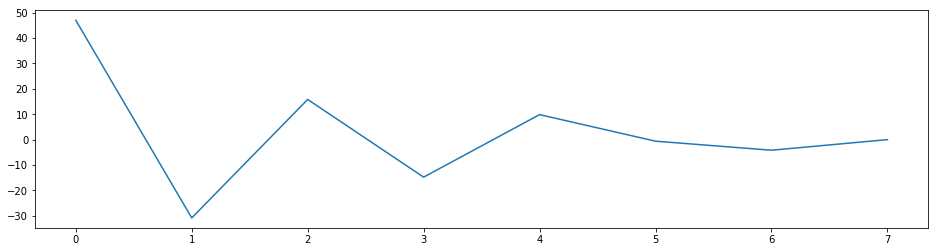

In [38]:
#8차원으로 감소된 feature를 출력해봅니다
pca_features = pca.transform(features)
print(pca_features.shape)
print(pca_features)
#feature 시각화
plt.figure(figsize=(16,4))
plt.plot(pca_features[0])

In [0]:
#pickle은 직렬화 모듈입니다 https://wayhome25.github.io/cs/2017/04/04/cs-04/ 참고
import pickle
#원하는 주소에 이미지, feature, pca를 직렬화 하여 저장합니다
features_save_path = '/content/gdrive/My Drive/DLC_TSNE/data/features_mine.p'
#기존 교수님 자료에 pca로 차원감소한 feature가 아닌 그냥 feature가 들어가 있어서 수정했습니다
pickle.dump([crop_imgs, pca_features, pca], open(features_save_path, 'wb'))

In [0]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [42]:
#저장했던 직렬화 모둘을 불러오고
images, pca_f, pca = pickle.load(open(features_save_path, 'rb'))
#출력도 한 번 해봅니다
for img, f in list(zip(images, pca_f))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: [[[155 152 132]
  [158 152 133]
  [158 152 131]
  ...
  [125 119  92]
  [126 119  96]
  [125 119  95]]

 [[154 152 130]
  [156 151 130]
  [157 152 130]
  ...
  [123 117  90]
  [126 119  94]
  [127 121  94]]

 [[155 151 127]
  [156 151 128]
  [155 150 128]
  ...
  [124 118  90]
  [125 120  92]
  [126 122  94]]

 ...

 [[160 161 156]
  [158 160 154]
  [160 161 156]
  ...
  [175 175 171]
  [175 175 173]
  [177 178 174]]

 [[159 162 155]
  [159 162 155]
  [158 159 154]
  ...
  [173 174 169]
  [176 176 173]
  [175 176 171]]

 [[159 161 155]
  [159 162 155]
  [161 162 156]
  ...
  [170 171 166]
  [174 175 170]
  [175 178 171]]], features: 46.97,-30.80,15.80,-14.76... 
image: [[[192 196 195]
  [192 196 195]
  [192 196 195]
  ...
  [204 207 198]
  [204 207 198]
  [204 207 198]]

 [[192 196 195]
  [193 197 196]
  [193 197 196]
  ...
  [204 207 198]
  [204 207 198]
  [204 207 198]]

 [[192 196 195]
  [192 196 195]
  [193 197 196]
  ...
  [203 208 198]
  [203 208 198]
  [204 207 198]]

 ..

8


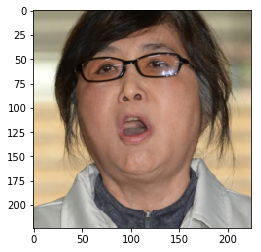

In [43]:
#이미지도 잘 직렬화되었는지 한 번 출력해 보고
print(len(images))
plt.imshow(images[0])

In [44]:
#민세희 교수님 자료에서 정상적으로 수정되었다면 차원감소된 feature의 shape가 나와야합니다(ex img_count, img_count or 50)
print(pca_f.shape)

(8, 8)


## 2차원 T_SNE

In [45]:
X = np.array(pca_f)
print(X.shape)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=1, angle=0.2, verbose=2).fit_transform(X)
                                                                                                  
print(tsne)                                                                                          
                                                                                                                                                                                   
                                                                                                  

(8, 8)
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 8 samples in 0.000s...
[t-SNE] Computed neighbors for 8 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 8 / 8
[t-SNE] Mean sigma: 6.850315
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 61.6238327, gradient norm = 0.4154577 (50 iterations in 0.006s)
[t-SNE] Iteration 100: error = 55.4307671, gradient norm = 0.4130340 (50 iterations in 0.005s)
[t-SNE] Iteration 150: error = 56.3896141, gradient norm = 0.1151785 (50 iterations in 0.005s)
[t-SNE] Iteration 200: error = 49.8267708, gradient norm = 0.2217096 (50 iterations in 0.005s)
[t-SNE] Iteration 250: error = 52.7865562, gradient norm = 0.3281409 (50 iterations in 0.005s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.786556
[t-SNE] Iteration 300: error = 0.4790449, gradient norm = 0.0012255 (50 iterations in 0.005s)
[t-SNE] Iteration 350: error = 0.3442478, gradient norm = 0.0007008 (50

In [0]:
#한 화면 안에 담아내야 하므로 min max 값에 맞춰 값을 조절해줍니다
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

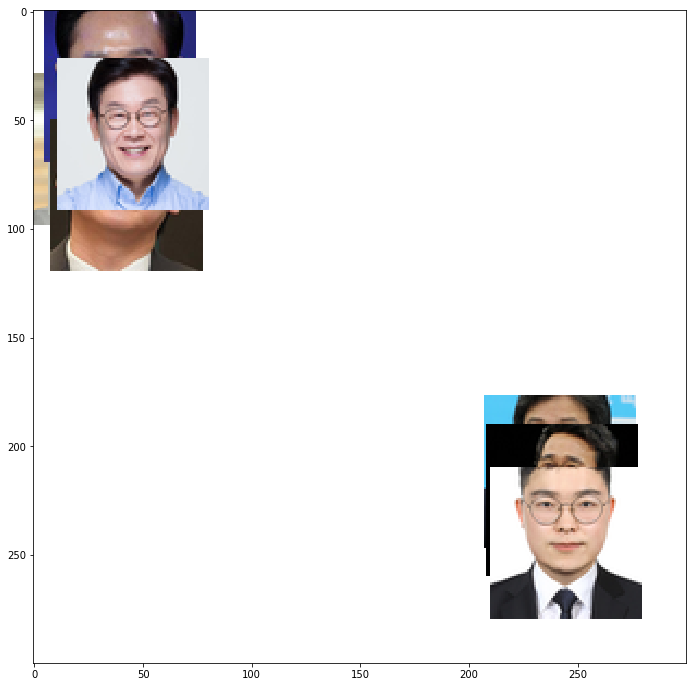

In [47]:
width = 300
height = 300
max_dim = 70

full_image = Image.new('RGBA', (width, height))

for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(img, 'RGB')
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim-20)*x), int((height-max_dim-20)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [54]:

dict_to_json = {}
dict_to_json['images'] = []
#딕셔너리를 만들어줍니다
#!float32(numpy) 형식은 json으로 컨버트 되지 않기 때문에 tx, ty의 형식을 float로 변환시켜 줍니다
#files_crop은 민세희교수님 자료에서 crop된 파일들의 이름이 저장되어있는 리스트입니다
for file_name, x, y in zip(files_crop, map(float, tx), map(float, ty)):
  dict_to_json['images'].append({
    'name': file_name,
    'x': x,
    'y': y,
})

#딕셔너리가 잘 생성됬는지 확인
print(dict_to_json)


{'images': [{'name': '0.jpg', 'x': 0.6493825912475586, 'y': 0.5906141400337219}, {'name': '1.jpg', 'x': 0.434707373380661, 'y': 0.6234831213951111}, {'name': '2.jpg', 'x': 0.4887928366661072, 'y': 0.2092018872499466}, {'name': '3.jpg', 'x': 1.0, 'y': 1.0}, {'name': '4.jpg', 'x': 0.0, 'y': 0.0}, {'name': '5.jpg', 'x': 0.6383928656578064, 'y': 0.494196355342865}, {'name': '6.jpg', 'x': 0.19313931465148926, 'y': 0.48165571689605713}, {'name': '7.jpg', 'x': 0.2629062235355377, 'y': 0.71763014793396}]}


In [0]:
#os.mkdir(os.path.join('data'))
#원하는 세이브 패스를 지정해줍니다 
path_default ='JSON'

if not os.path.isdir(path_default):
    os.makedirs(os.path.join(path_default))


In [0]:

#dict2json, sort_keys는 키를 정렬할 지 여부, indent는 보기 좋게 정렬/들여쓰기를 얼마나 할 것인지에 대한 여부
with open(os.path.join(path_default) + '/data.json', 'w') as outfile:
    json.dump(dict_to_json, outfile, sort_keys=True, indent=4)